In [24]:
#view image in breastmnist file in dataset folder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os

dfile = '../Datasets/bloodmnist.npz'
if not os.path.exists(dfile):
	raise FileNotFoundError(f"The file {dfile} does not exist.")
data_bloodmnist = np.load(dfile)

images = data_bloodmnist['train_images']

images.shape


(11959, 28, 28, 3)

Train images: (11959, 28, 28, 3)
Train labels: (11959, 1)


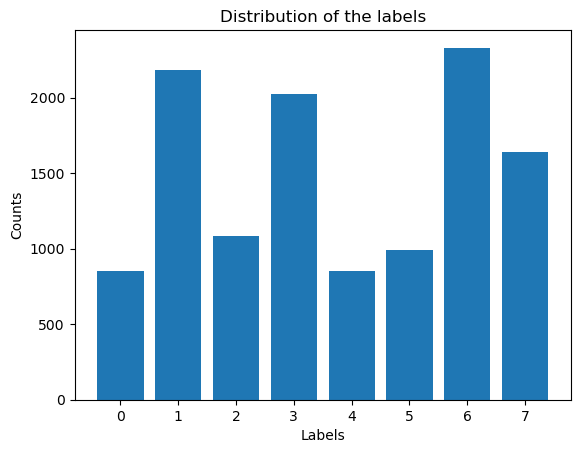

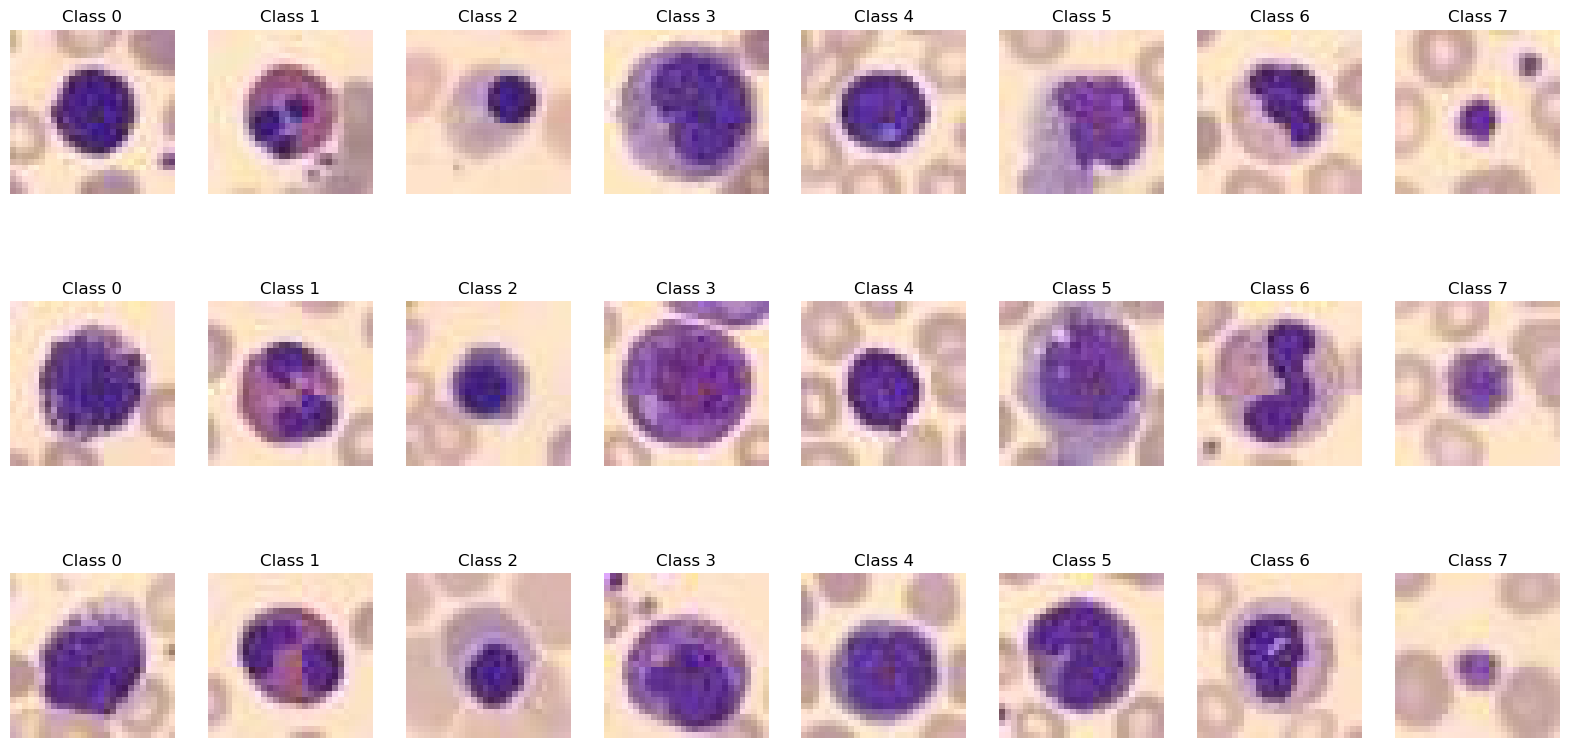

In [25]:
#Exploring the bloodmnist dataset

bloodmnist_train_images = data_bloodmnist['train_images']
bloodmnist_train_labels = data_bloodmnist['train_labels']

bloodmnist_val_images = data_bloodmnist['val_images']
bloodmnist_val_labels = data_bloodmnist['val_labels']

bloodmnist_test_images = data_bloodmnist['test_images']
bloodmnist_test_labels = data_bloodmnist['test_labels']

#Inspect the data
print(f'Train images: {bloodmnist_train_images.shape}')
print(f'Train labels: {bloodmnist_train_labels.shape}')

#Summary statistics of the labels
unique, counts = np.unique(bloodmnist_train_labels, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of the labels')
plt.show()

# Visualize each class of the dataset
n_classes = len(np.unique(bloodmnist_train_labels))
fig, axes = plt.subplots(3, n_classes, figsize=(20, 10))
for i in range(n_classes):
    # Select the first 3 images of each class
    class_idx = np.where(bloodmnist_train_labels == i)[0][:3]
    for j, idx in enumerate(class_idx):
        axes[j, i].imshow(bloodmnist_train_images[idx])
        axes[j, i].set_title(f'Class {i}')
        axes[j, i].axis('off')
plt.show()




In [26]:
# Flatten the images
bloodmnist_train_images = bloodmnist_train_images.reshape(-1, 28*28*3)
bloodmnist_val_images = bloodmnist_val_images.reshape(-1, 28*28*3)
bloodmnist_test_images = bloodmnist_test_images.reshape(-1, 28*28*3)

print(f'Train images: {bloodmnist_train_images.shape}')


Train images: (11959, 2352)


In [27]:
# Normalize the images
bloodmnist_train_images = bloodmnist_train_images / 255.0
bloodmnist_val_images = bloodmnist_val_images / 255.0
bloodmnist_test_images = bloodmnist_test_images / 255.0

In [6]:
# Train a SVC model on the dataset using various kernels
from sklearn.svm import SVC



# Create the model
svc_linear = SVC(kernel='linear')
svc_poly = SVC(kernel='poly')
svc_rbf = SVC(kernel='rbf')
svc_sigmoid = SVC(kernel='sigmoid')

kernels = { 'Linear': [svc_linear], 'Poly': [svc_poly], 'RBF': [svc_rbf], 'Sigmoid': [svc_sigmoid]}

for n in kernels:
    model = kernels[n][0]
    model.fit(bloodmnist_train_images, bloodmnist_train_labels)
    kernels[n].append(model.predict(bloodmnist_val_images))
 

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Classification report for SVC with Linear kernel on Validation data:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       122
           1       0.94      0.94      0.94       312
           2       0.88      0.88      0.88       155
           3       0.64      0.73      0.68       290
           4       0.77      0.83      0.80       122
           5       0.75      0.66      0.70       143
           6       0.93      0.89      0.91       333
           7       0.99      1.00      0.99       235

    accuracy                           0.84      1712
   macro avg       0.82      0.81      0.81      1712
weighted avg       0.84      0.84      0.84      1712

Classification report for SVC with Poly kernel on Validation data:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       122
           1       0.96      0.97      0.97       312
           2       0.88      0.91      0.90       

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


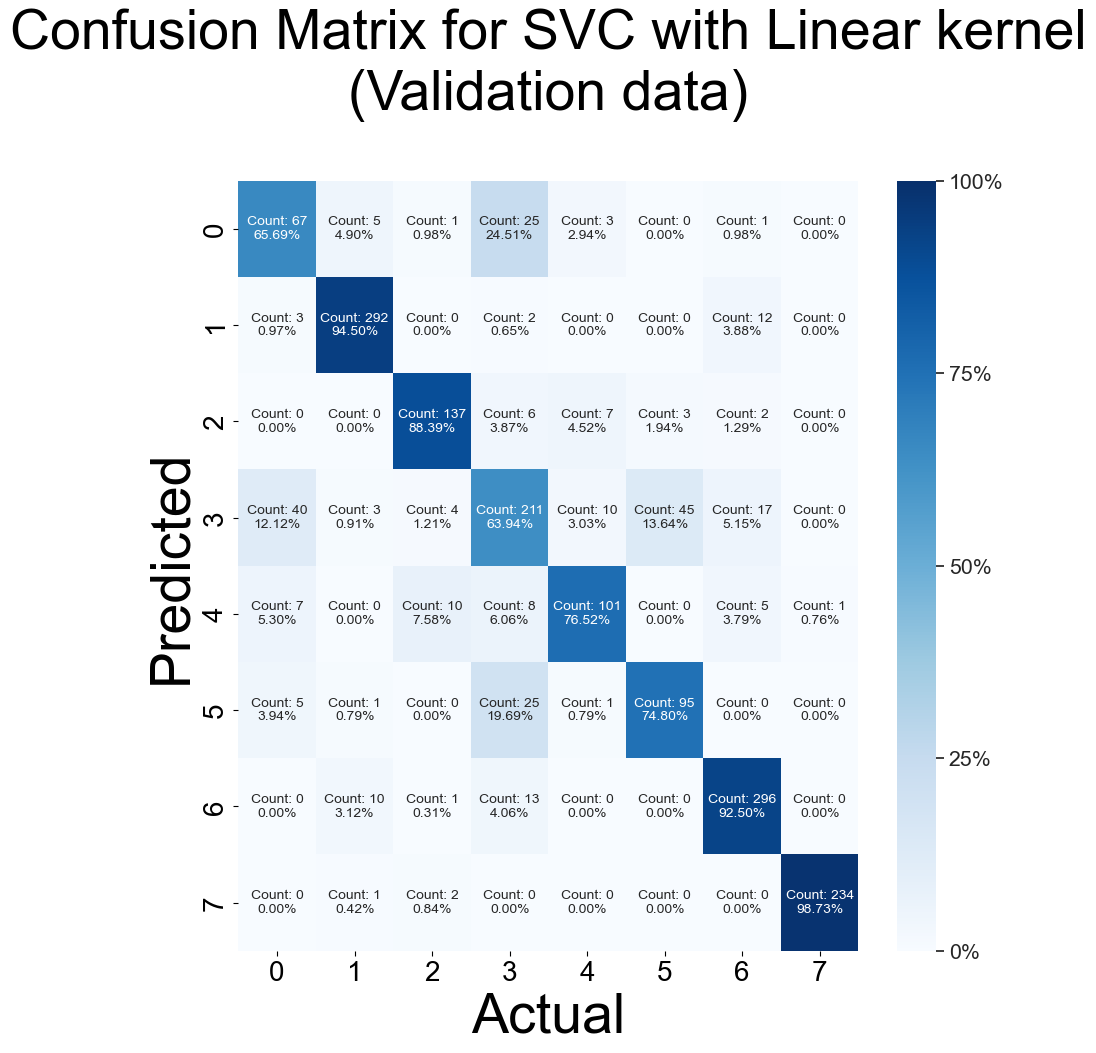

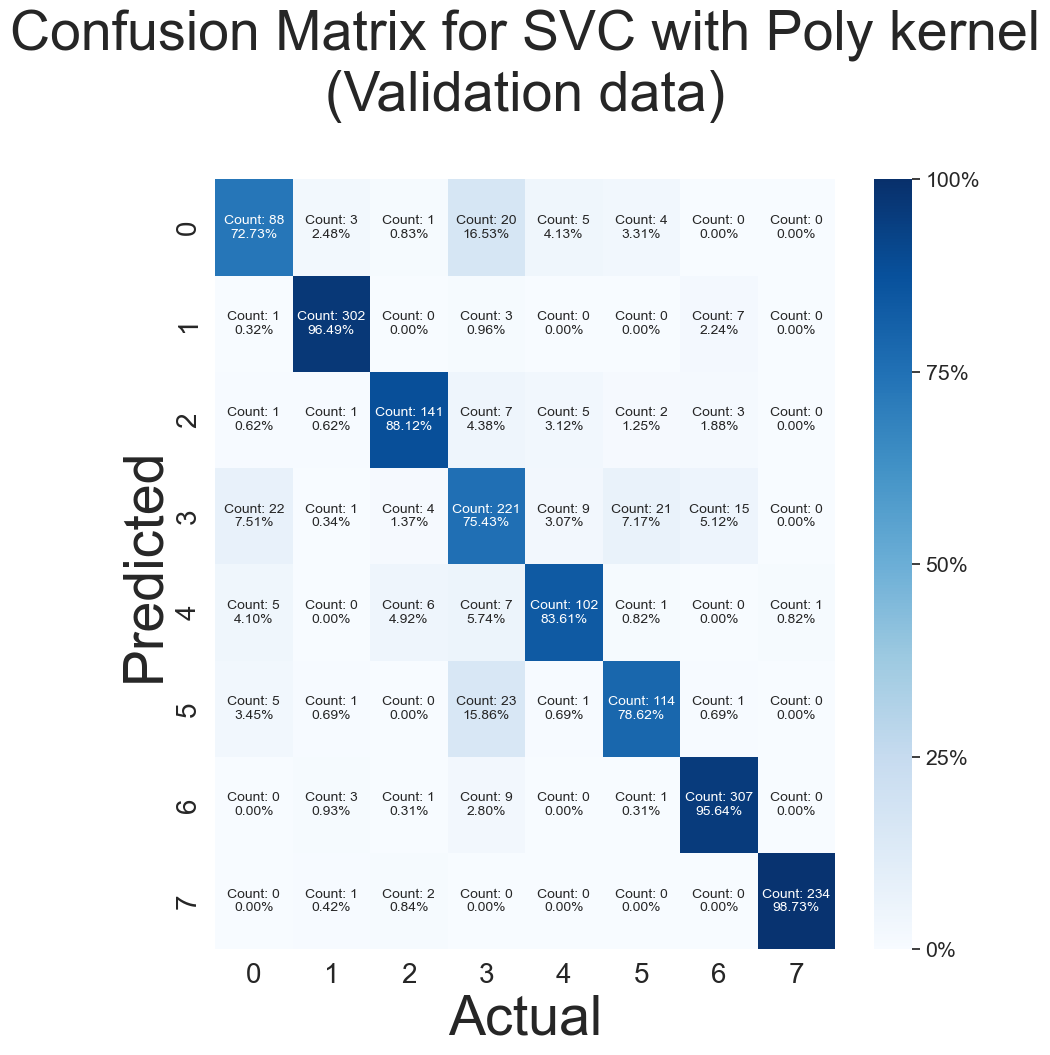

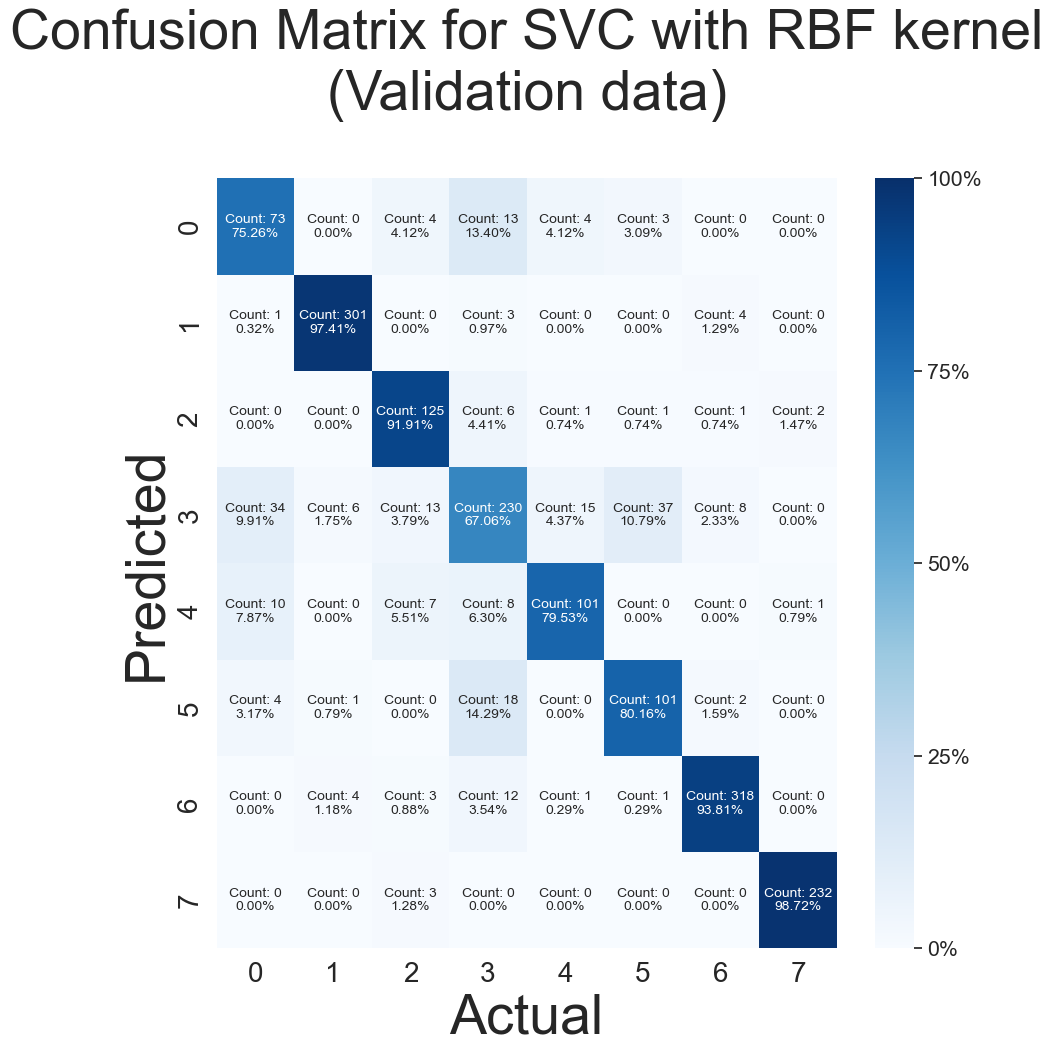

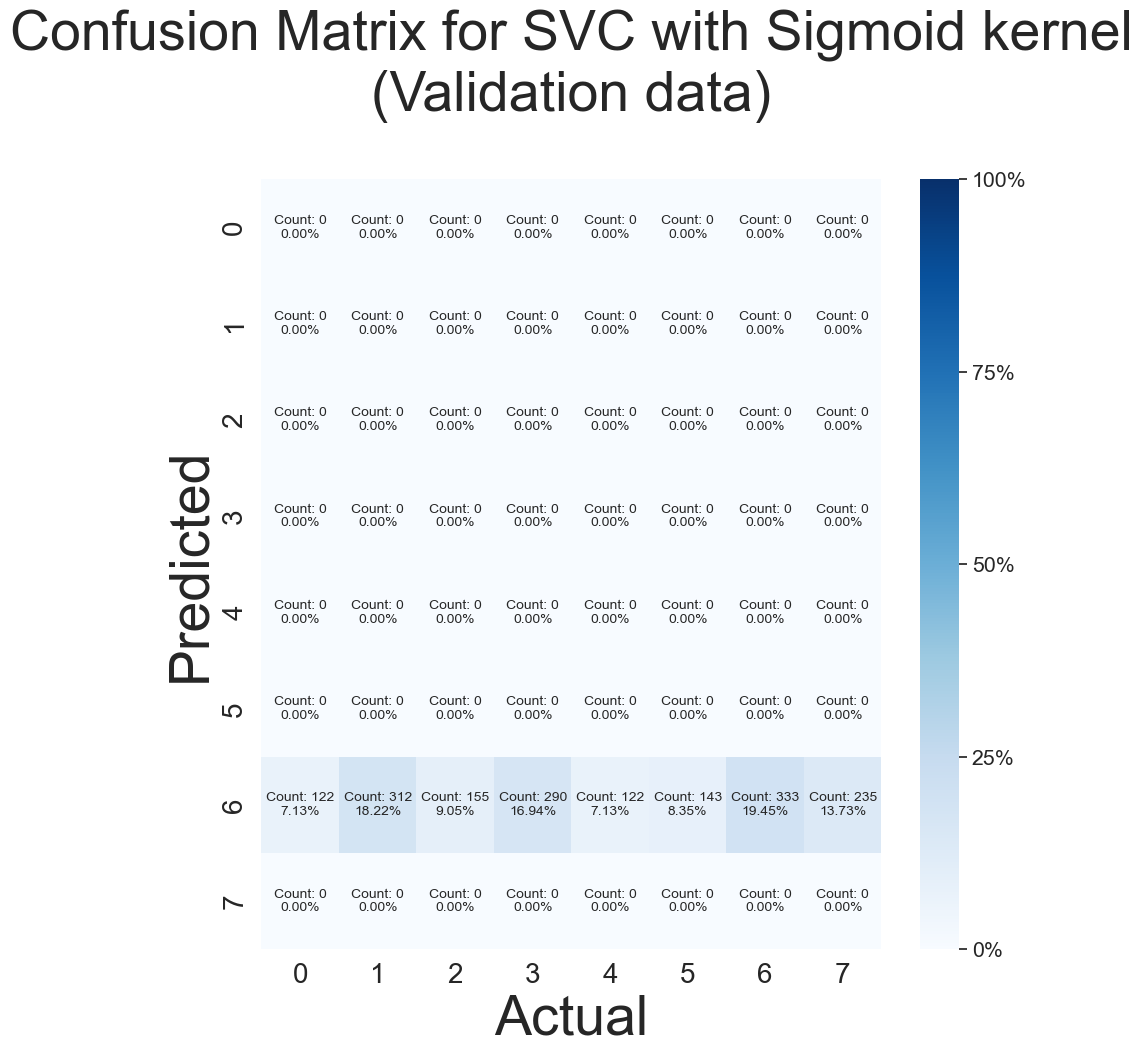

In [7]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

for n in kernels:
    model_evaluation(bloodmnist_val_labels, kernels[n][1], f'SVC with {n} kernel', 'Validation')


In [8]:
# Tune RBF kernel and porvide additional, probablistic metrics
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10,], 'gamma': [0.01, 0.001]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2, scoring='f1_weighted')
grid.fit(bloodmnist_train_images, bloodmnist_train_labels)

print(grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 3.0min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 3.1min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 3.1min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 2.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 3.0min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=0.1, gamma=0.001; total time= 4.1min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=0.1, gamma=0.001; total time= 3.9min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=0.1, gamma=0.001; total time= 4.3min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=0.1, gamma=0.001; total time= 4.1min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=0.1, gamma=0.001; total time= 4.0min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 1.9min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 1.7min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.0min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.1min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.0min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, gamma=0.001; total time= 6.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, gamma=0.001; total time= 2.4min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, gamma=0.001; total time= 2.5min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, gamma=0.001; total time= 2.6min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, gamma=0.001; total time= 2.5min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 1.6min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 1.6min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 1.5min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 1.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 1.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=10, gamma=0.001; total time= 1.9min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=10, gamma=0.001; total time= 1.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=10, gamma=0.001; total time= 1.8min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=10, gamma=0.001; total time= 1.6min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=10, gamma=0.001; total time= 1.7min


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'gamma': 0.01}


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for SVC with RBF kernel (Tuned) on Validation data:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       122
           1       0.97      0.97      0.97       312
           2       0.91      0.91      0.91       155
           3       0.76      0.82      0.79       290
           4       0.88      0.86      0.87       122
           5       0.85      0.78      0.81       143
           6       0.95      0.95      0.95       333
           7       0.99      1.00      0.99       235

    accuracy                           0.90      1712
   macro avg       0.89      0.88      0.88      1712
weighted avg       0.90      0.90      0.90      1712



'              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.77       122\n           1       0.97      0.97      0.97       312\n           2       0.91      0.91      0.91       155\n           3       0.76      0.82      0.79       290\n           4       0.88      0.86      0.87       122\n           5       0.85      0.78      0.81       143\n           6       0.95      0.95      0.95       333\n           7       0.99      1.00      0.99       235\n\n    accuracy                           0.90      1712\n   macro avg       0.89      0.88      0.88      1712\nweighted avg       0.90      0.90      0.90      1712\n'

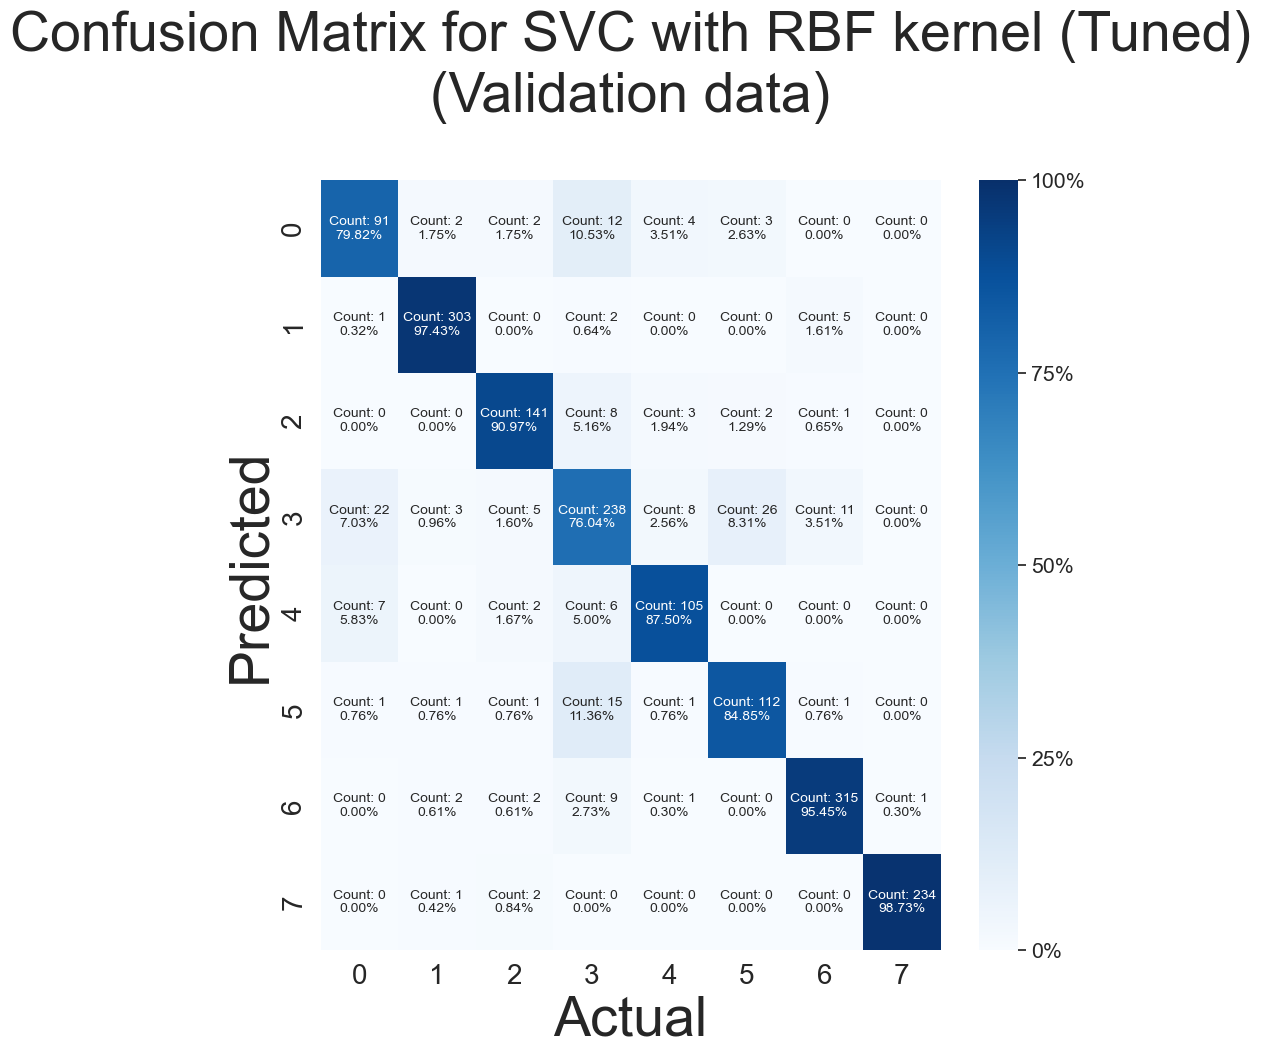

In [24]:
# c 10 gamma 0.01
svc_rbf_tuned = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
svc_rbf_tuned.fit(bloodmnist_train_images, bloodmnist_train_labels)   
svc_rbf_tuned_pred_val = svc_rbf_tuned.predict(bloodmnist_val_images)

model_evaluation(bloodmnist_val_labels, svc_rbf_tuned_pred_val, 'SVC with RBF kernel (Tuned)', 'Validation')



In [26]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Predict the probabilities of the validation set
svc_rbf_tuned_pred_val_prob = svc_rbf_tuned.predict_proba(bloodmnist_val_images)

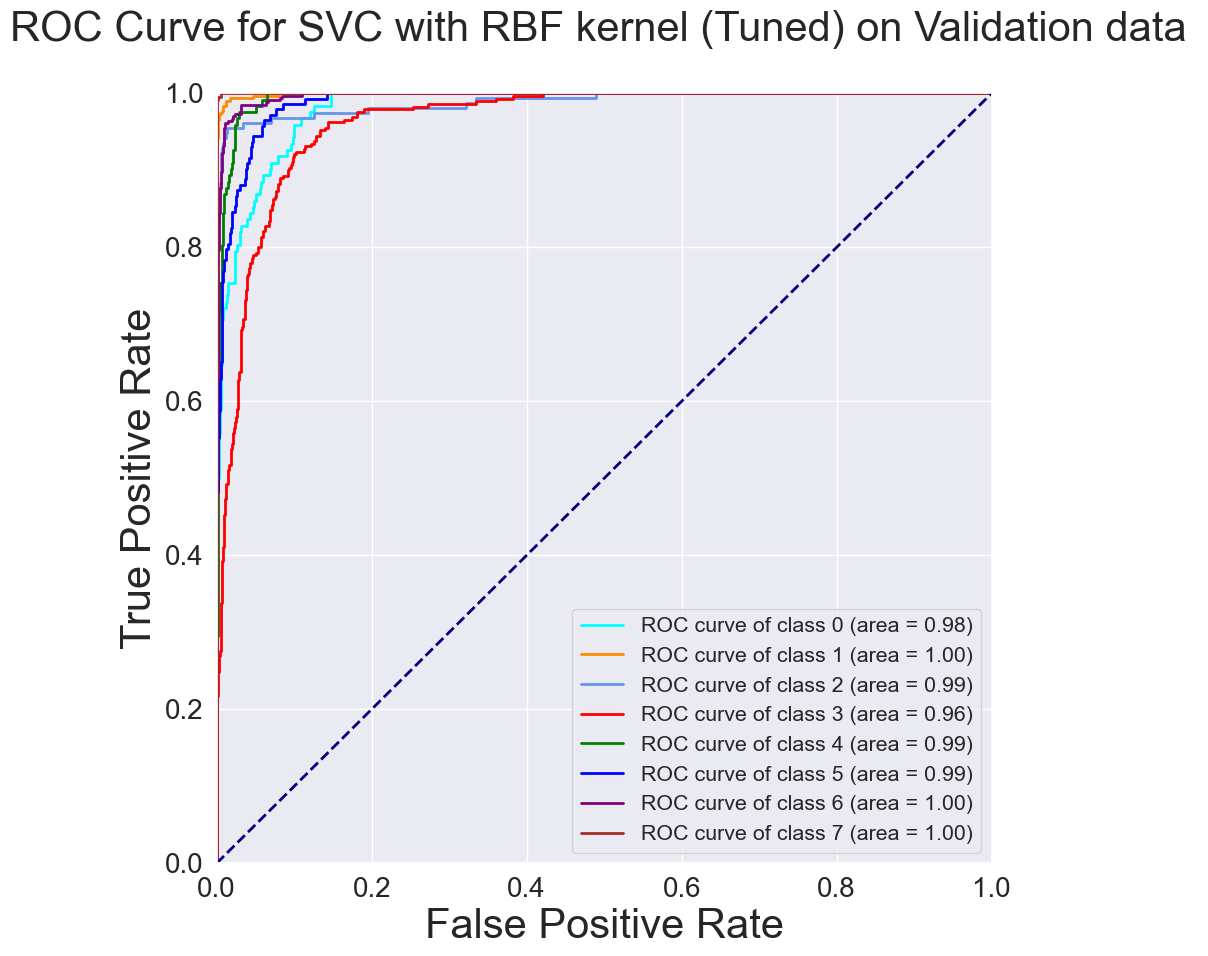

In [28]:
# Plot the results on roc curve
plot_roc_curve_multi(bloodmnist_val_labels, svc_rbf_tuned_pred_val_prob, 'SVC with RBF kernel (Tuned)', 'Validation')

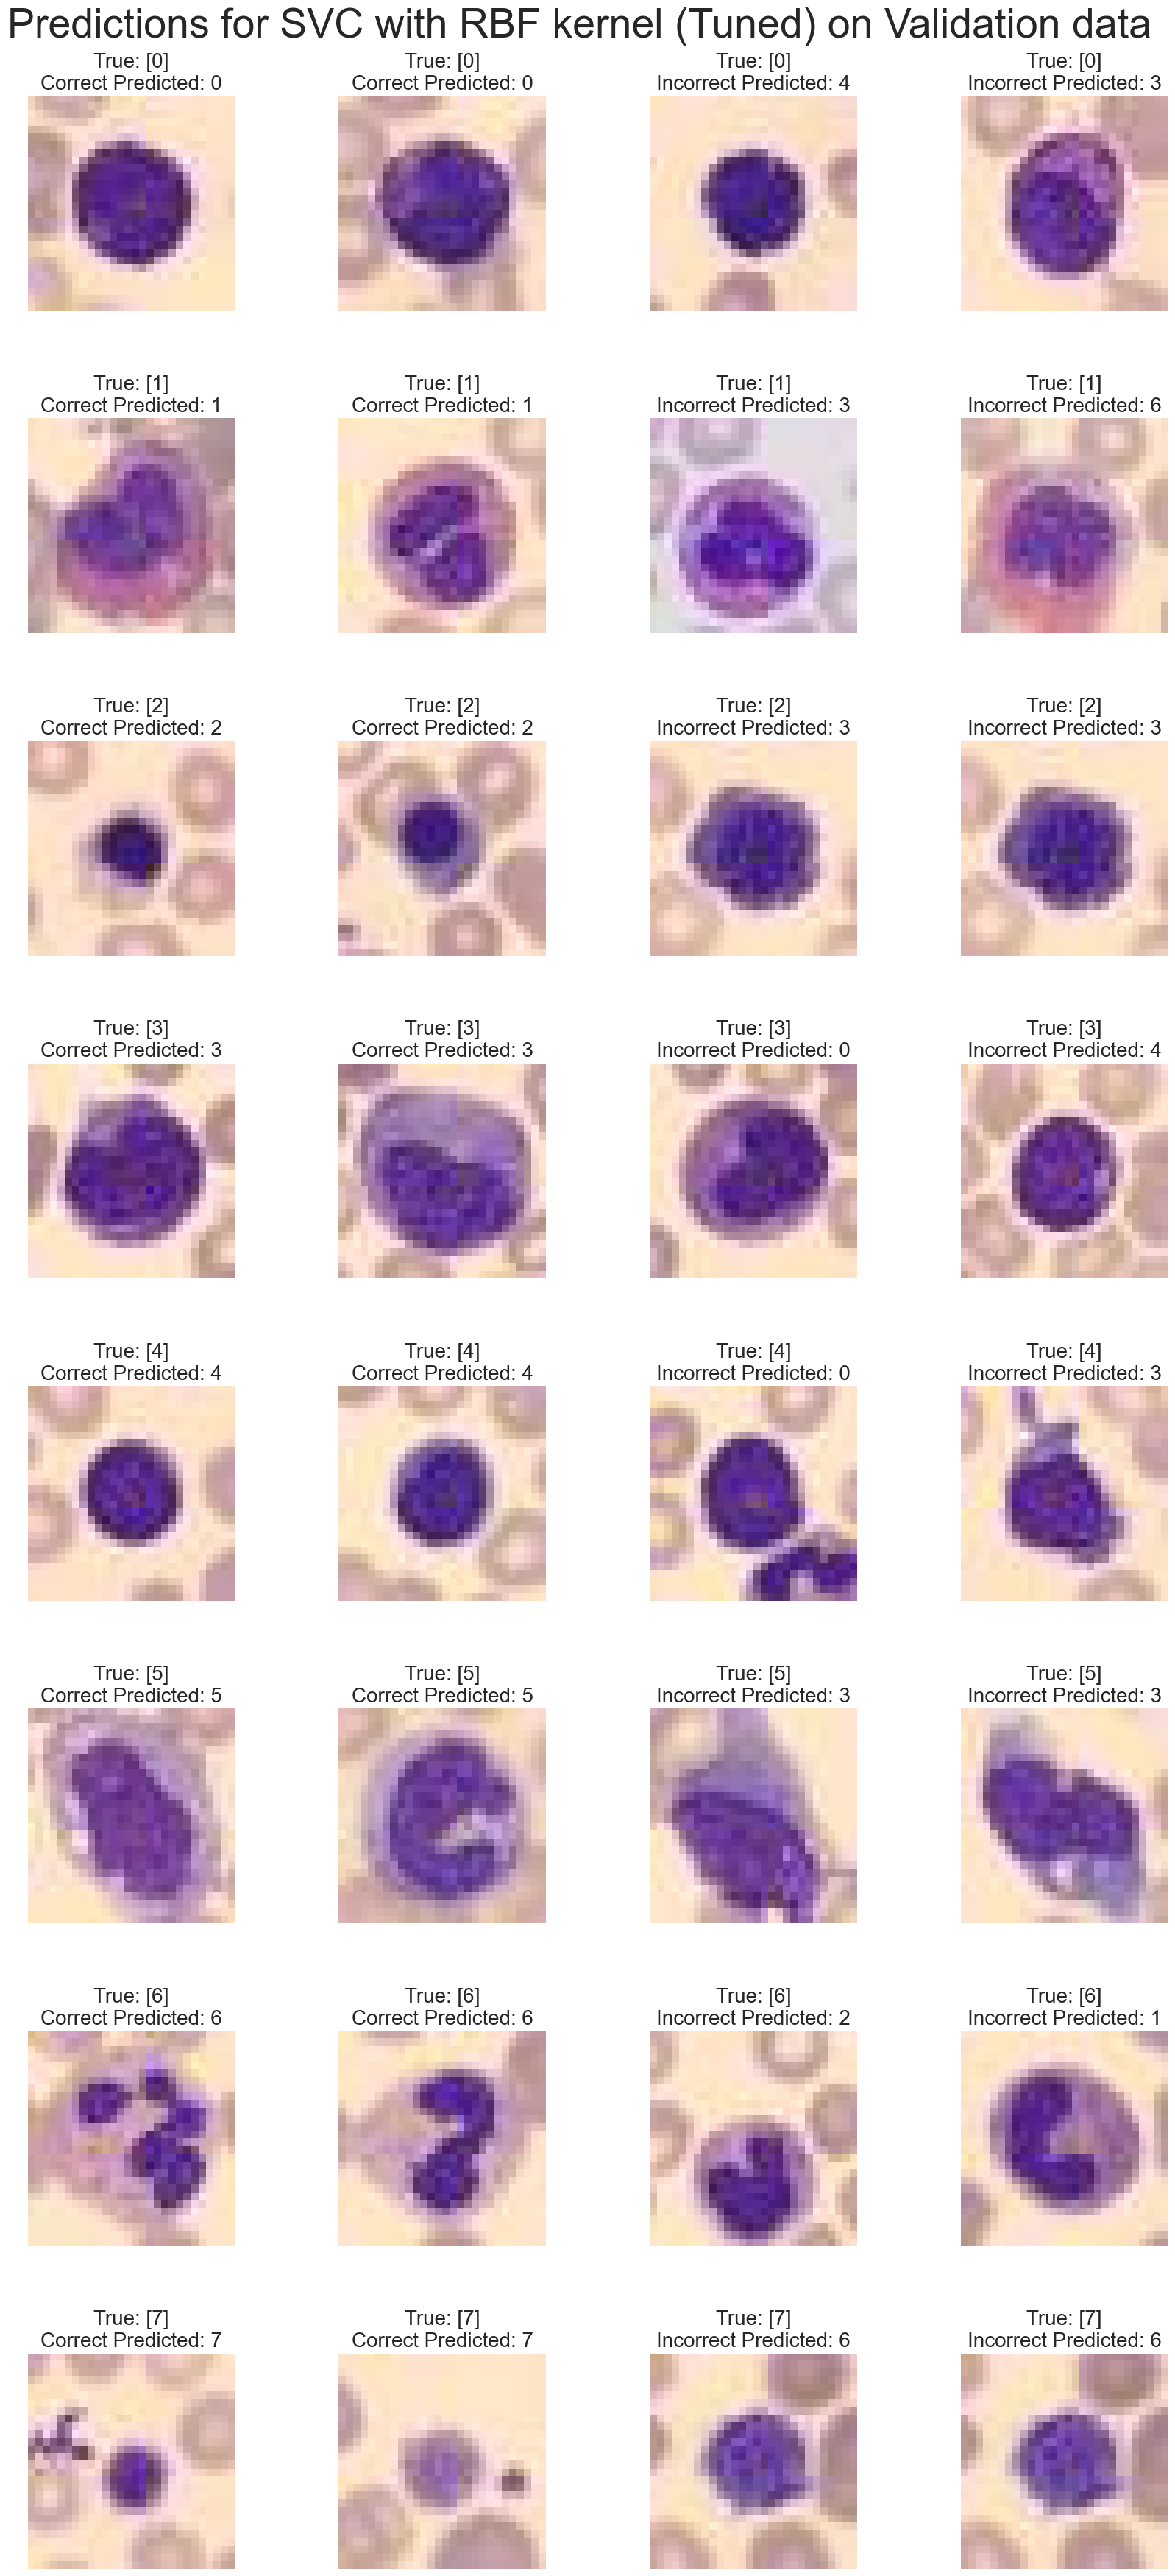

In [72]:
# Display the Incorrectly classified images
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


display_incorrect_images(data_bloodmnist['val_images'], bloodmnist_val_labels, svc_rbf_tuned_pred_val, 'SVC with RBF kernel (Tuned)', 'Validation')

In [ ]:
# Build a CNN classifier in PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.metrics import f1_score

# Define the CNN model
class BloodMnistCNN(nn.Module):
    def __init__(self, h1=400, h2=128,  num_classes=8):
        super(BloodMnistCNN, self).__init__()
        #self.conv1 = nn.Conv2d(3, 32, 3, 1, padding=1)
        #self.conv2 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(28*28*3, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(128, num_classes)  
        
        
    def forward(self, x):
        #x = F.relu(self.conv1(x))
        #x = F.relu(self.conv2(x))
        #x= F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output = x
        return output
    
# Define the dataset class
class BloodMnistDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
# Define the transformations
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((28, 28)),
                                transforms.ToTensor()])

# Create the dataset
train_dataset = BloodMnistDataset(data_bloodmnist['train_images'], data_bloodmnist['train_labels'], transform)
val_dataset = BloodMnistDataset(data_bloodmnist['val_images'], data_bloodmnist['val_labels'], transform)
test_dataset = BloodMnistDataset(data_bloodmnist['test_images'], data_bloodmnist['test_labels'], transform)

print(data_bloodmnist['train_labels'].shape)


# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create the model
model = BloodMnistCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


(11959, 1)


In [143]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Initialize lists to store training and validation losses
train_losses, val_losses = train_validation(model, device, train_loader, val_loader, optimizer, criterion, n_epochs=100)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 8)

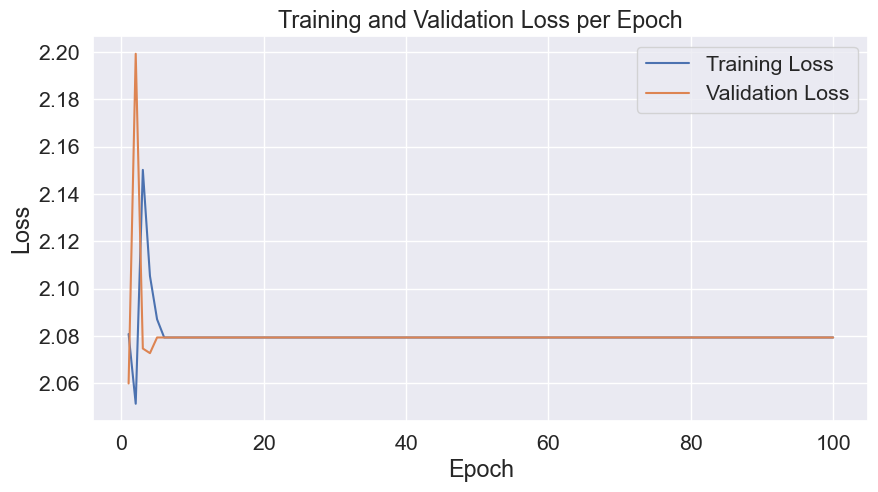

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report for Model on Validation data:
              precision    recall  f1-score   support

           0       0.09      1.00      0.17         6
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        10

    accuracy                           0.09        64
   macro avg       0.01      0.12      0.02        64
weighted avg       0.01      0.09      0.02        64



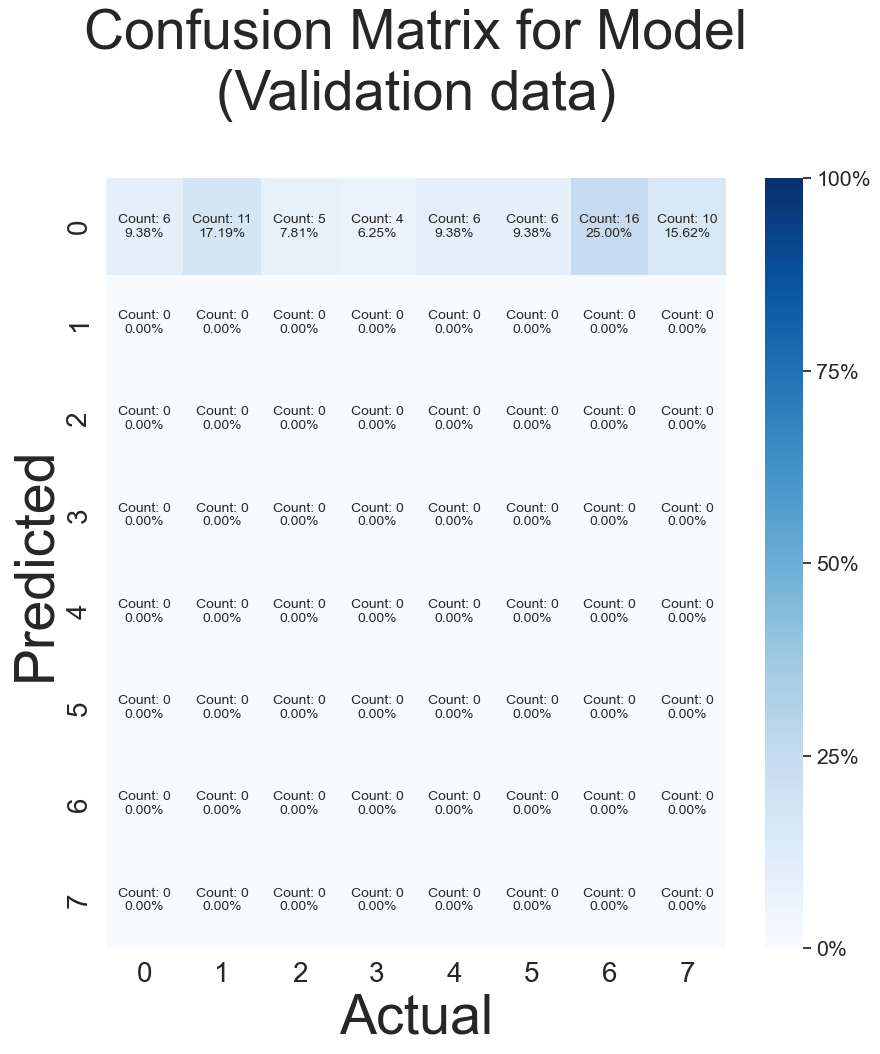

In [141]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


plot_train_validation(model, device, val_loader, train_losses, val_losses, n_epochs=100)